# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-объявлений-о-продаже-квартир" data-toc-modified-id="Исследование-объявлений-о-продаже-квартир-1">Исследование объявлений о продаже квартир</a></span><ul class="toc-item"><li><span><a href="#Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию." data-toc-modified-id="Шаг-1.-Откройте-файл-с-данными-и-изучите-общую-информацию.-1.1">Шаг 1. Откройте файл с данными и изучите общую информацию.</a></span></li><li><span><a href="#Шаг-1.Вывод" data-toc-modified-id="Шаг-1.Вывод-1.2">Шаг 1.Вывод</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-1.3">Шаг 2. Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Шаг-2.1-Работа-с-пропусками" data-toc-modified-id="Шаг-2.1-Работа-с-пропусками-1.3.1">Шаг 2.1 Работа с пропусками</a></span></li><li><span><a href="#Шаг-2.1.-Вывод" data-toc-modified-id="Шаг-2.1.-Вывод-1.3.2">Шаг 2.1. Вывод</a></span></li><li><span><a href="#Шаг-2.2.-Изменение-типа-данных-для-столбцов" data-toc-modified-id="Шаг-2.2.-Изменение-типа-данных-для-столбцов-1.3.3">Шаг 2.2. Изменение типа данных для столбцов</a></span></li><li><span><a href="#Шаг-2.2.-Вывод" data-toc-modified-id="Шаг-2.2.-Вывод-1.3.4">Шаг 2.2. Вывод</a></span></li></ul></li><li><span><a href="#Шаг-2.-Вывод" data-toc-modified-id="Шаг-2.-Вывод-1.4">Шаг 2. Вывод</a></span></li><li><span><a href="#Шаг-3.-Посчитайте-и-добавьте-в-таблицу" data-toc-modified-id="Шаг-3.-Посчитайте-и-добавьте-в-таблицу-1.5">Шаг 3. Посчитайте и добавьте в таблицу</a></span></li><li><span><a href="#Шаг-3.-Вывод" data-toc-modified-id="Шаг-3.-Вывод-1.6">Шаг 3. Вывод</a></span></li><li><span><a href="#Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции" data-toc-modified-id="Шаг-4.-Проведите-исследовательский-анализ-данных-и-выполните-инструкции-1.7">Шаг 4. Проведите исследовательский анализ данных и выполните инструкции</a></span><ul class="toc-item"><li><span><a href="#Шаг-4.1.-Изучем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Шаг-4.1.-Изучем-следующие-параметры:-площадь,-цена,-число-комнат,-высота-потолков-1.7.1">Шаг 4.1. Изучем следующие параметры: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Шаг-4.1.-Вывод" data-toc-modified-id="Шаг-4.1.-Вывод-1.7.2">Шаг 4.1. Вывод</a></span></li><li><span><a href="#Шаг-4.2.-Сроки-продажи-квартиры" data-toc-modified-id="Шаг-4.2.-Сроки-продажи-квартиры-1.7.3">Шаг 4.2. Сроки продажи квартиры</a></span></li><li><span><a href="#Шаг-4.2.-Вывод" data-toc-modified-id="Шаг-4.2.-Вывод-1.7.4">Шаг 4.2. Вывод</a></span></li><li><span><a href="#Шаг-4.3.--Зависимость-стоимости-квартиры-от-разных-параметров" data-toc-modified-id="Шаг-4.3.--Зависимость-стоимости-квартиры-от-разных-параметров-1.7.5">Шаг 4.3.  Зависимость стоимости квартиры от разных параметров</a></span></li><li><span><a href="#Шаг-4.3.-Вывод" data-toc-modified-id="Шаг-4.3.-Вывод-1.7.6">Шаг 4.3. Вывод</a></span></li><li><span><a href="#Шаг-4.4.-Изучим-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Шаг-4.4.-Изучим-зависимость-от-даты-размещения:-дня-недели,-месяца-и-года-1.7.7">Шаг 4.4. Изучим зависимость от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#Шаг-4.4.-Вывод" data-toc-modified-id="Шаг-4.4.-Вывод-1.7.8">Шаг 4.4. Вывод</a></span></li><li><span><a href="#Шаг-4.5.-Населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья" data-toc-modified-id="Шаг-4.5.-Населённые-пункты-с-самой-высокой-и-низкой-стоимостью-жилья-1.7.9">Шаг 4.5. Населённые пункты с самой высокой и низкой стоимостью жилья</a></span></li><li><span><a href="#Шаг-4.5.-Вывод" data-toc-modified-id="Шаг-4.5.-Вывод-1.7.10">Шаг 4.5. Вывод</a></span></li><li><span><a href="#Шаг-4.6.-Изучите-предложения-квартир:-какая-область-входит-в-центр-и-как-цена-зависит-от-удалённости-от-центра." data-toc-modified-id="Шаг-4.6.-Изучите-предложения-квартир:-какая-область-входит-в-центр-и-как-цена-зависит-от-удалённости-от-центра.-1.7.11">Шаг 4.6. Изучите предложения квартир: какая область входит в центр и как цена зависит от удалённости от центра.</a></span></li><li><span><a href="#Шаг-4.6.-Вывод" data-toc-modified-id="Шаг-4.6.-Вывод-1.7.12">Шаг 4.6. Вывод</a></span></li><li><span><a href="#Шаг-4.7.-Изучем-следующие-параметры-для-квартир-в-центре:-площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Шаг-4.7.-Изучем-следующие-параметры-для-квартир-в-центре:-площадь,-цена,-число-комнат,-высота-потолков-1.7.13">Шаг 4.7. Изучем следующие параметры для квартир в центре: площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Шаг-4.7.-Вывод" data-toc-modified-id="Шаг-4.7.-Вывод-1.7.14">Шаг 4.7. Вывод</a></span></li><li><span><a href="#Шаг-4.8.-Факторы,-которые-влияют-на-стоимость-квартиры:-число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления**" data-toc-modified-id="Шаг-4.8.-Факторы,-которые-влияют-на-стоимость-квартиры:-число-комнат,-этаж,-удалённость-от-центра,-дата-размещения-объявления**-1.7.15">Шаг 4.8. Факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления**</a></span></li><li><span><a href="#Шаг-4.8.-Вывод" data-toc-modified-id="Шаг-4.8.-Вывод-1.7.16">Шаг 4.8. Вывод</a></span></li><li><span><a href="#Шаг-4.9.-Изучим-зависимость-стоимости-в-центре-от-даты-размещения:-дня-недели,-месяца-и-года" data-toc-modified-id="Шаг-4.9.-Изучим-зависимость-стоимости-в-центре-от-даты-размещения:-дня-недели,-месяца-и-года-1.7.17">Шаг 4.9. Изучим зависимость стоимости в центре от даты размещения: дня недели, месяца и года</a></span></li><li><span><a href="#Шаг-4.9.-Вывод" data-toc-modified-id="Шаг-4.9.-Вывод-1.7.18">Шаг 4.9. Вывод</a></span></li><li><span><a href="#Шаг-4.10.-Отличияются-ли-факторы,-которые-влияют-на-стоимость-квартиры,-в-центре-от-всего-файла" data-toc-modified-id="Шаг-4.10.-Отличияются-ли-факторы,-которые-влияют-на-стоимость-квартиры,-в-центре-от-всего-файла-1.7.19">Шаг 4.10. Отличияются ли факторы, которые влияют на стоимость квартиры, в центре от всего файла</a></span></li><li><span><a href="#Шаг-4.10.-Вывод" data-toc-modified-id="Шаг-4.10.-Вывод-1.7.20">Шаг 4.10. Вывод</a></span></li></ul></li><li><span><a href="#Шаг-4.-Вывод" data-toc-modified-id="Шаг-4.-Вывод-1.8">Шаг 4. Вывод</a></span></li><li><span><a href="#Шаг-5.-Общий-вывод" data-toc-modified-id="Шаг-5.-Общий-вывод-1.9">Шаг 5. Общий вывод</a></span><ul class="toc-item"><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-1.9.1">Чек-лист готовности проекта</a></span></li></ul></li></ul></li></ul></div>

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from IPython.display import display
import seaborn as sns
from pymystem3 import Mystem
m = Mystem()

data = pd.read_csv('/datasets/real_estate_data.csv')
display(data.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеились в одну строку вместо того, чтобы разбиться по колонкам. Разобьем их вручную параметром **sep**

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Проверим получившуюся таблицу

In [3]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Сразу замечаем, что в таблице очень много NaN значений. Получим общую информацию по таблице

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Посмотрим на полученую информацию о таблице.

Таблица содержит 22 столбца с различными типами данных, а именно:

- 2 столбца с типом данных bool
- 14 столбцов с типом данных float(64)
- 3 столбца с типом данных int64
- 3 столбца с типом данных object

Разберем, как называются столбцы и какую информацию они отображают:

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** — число балконов
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах(м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000** — число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

Типы в некоторых столбцах, нам не подходят. Изменим слудующие столбцы:

- **airports_nearest**, **cityCenters_nearest**, **parks_nearest**, **ponds_nearest** поменяет на целочисленые, зачем считать сантиметры.
- **parks_around3000**, **ponds_around3000** поменяем на целочисленные, нам не нужны полпарка и полводоема.
- **days_exposition** поменяем все значения на целочисленные, день это целое число.
- **balcony**, **floors_total** поменяем все значения на целочисленные, нам не нужны полбалкона и полэтажа.
- **first_day_exposition** переведем в корректные даты.
- **last_price** переведем в целочисленные, не будет считать копейки.
- **total_area**, **living_area**, **kitchen_area**, **ceiling_height** округлим значение до 1го знака после запятой.

Колличество отсутсвующих значений удручает, наиболее проблемные столбцы:

- **is_apartment**
- **balcony**
- **ceiling_height**
- **parks_nearest**
- **ponds_nearest**

Есть гипотезы, почему данные в данных столбца отсутствуют в таком большом количестве, выдвенем их в выводах.

Получим более детальную информацию по столбцам и найдем выделяющиеся значения.

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


В целом данные выглядят нормально, правда есть выбросы :

- Кваритра с площадью 900 м²
- Квартира с 19 комнатами
- Квартира с 100 метровыми потолками
- Квартира с жилой площадью 409 м²
- Кваритра с площадью кухни 112 м²
- Квартира с 5 балконами
- Квартира которая продавалась 1580 дней ( более 4 лет)

В ходе исслеования посмотрим, что мы сможем сделать с ними.

## Шаг 1.Вывод

Данные которые предоставлены для исследования довольно "грязные", этому способствует большое колличество отсутсвующих значений и выбивающиеся из общей логики выбросы.

Построю гипотезы по поводу отсутствия данных в наиболее проблемных столбцах:

- **is_apartment**, предполагаю что в данном столбце пропущены значения, потому что большинство людей, (в том числе и я ,пока не взялся за это исследование) не знаю что такое апартаменты и чем они отличаются от квартир. Из этого может следовать, что люди,которые не знают что это такое, просто пропускали это пункт при заполнении данных.  
- **balcony**, медиана по данному столбцу показывает значение равное 1. Так же исходя из моих собственных примечаний большинство квартир в России, в частности в Санкт-Петербурге, имеют в подавляющем большинстве случаев 1 балкон или не имеют его вовсе. Исходя из выше сказанного, предполагаю что все пропущенные значения - это 0 балконов.
- **ceiling_height**, предполагаю что в данном столбце пропущены значения, тк для большинства людей это не является основополагающим критерием оценки для продажи квартиры, поэтому люди скорее всего просто не заполняли эти данные.
- **parks_nearest** и **ponds_nearest** скорее всего по данным столбцам данные просто были не выгружены. Так как данные по количеству ближайших парков и водоемов ограничиваются 3000 метров, то для данных обьявлений растояние до ближайшего парка или водоема составляет более 3000 метров.

Так же пробежимся по столбцам где данные отсутсвуют в меньших колличествах:

- **cityCenters_nearest**, предполагаю что данные не указаны в тех строках, тк эта квартира/апартаменты расположены в центре, соотвественно растояние до центра 0, либо система задала определенный радиус от центра и квартиры которые не попали в это радиус, не получили значение.
- **airports_nearest** по аналогии с cityCenters_nearest, либо находятся в непосредственной близости к аэропорту, либо не попали в радиус определенный системой.
- **days_exposition**, предполагаю что люди, которые продавали квартиру/апартаменты, банально не закрыли обьявление, либо по какой-то причине закрыли его в день создания.
- **kitchen_area**, предполагаю что люди, которые продавали квартиру/апартаменты, просто не владели этими данными. Так же есть предположение что данные отсутвуют, потому что это квартира "студия", где кухня непосредственно сопрежена с жилой площадью.
- **floors_total**, предполагаю что люди просто не указали общую этажность здания, тк в форме заполнения этот параметр был не важен.
- **living_area**, предполагаю что люди просто не знали данный параметр, а имели только общую площадь квартиры/апартаментов.
- **locality_name**, предполагаю что люди просто не указали название, тк для них это было очевидным, те если ты заходишь в раздел где продаются квартиры из Санкт-Петербурга, то данная квартира и находится в данном городе.
- **parks_around3000**, предполагаю что данные отсутсвуют, от того что их просто нет, те в радиусе 3000 метров нет ниодного парка.
- **ponds_around3000**, по аналогии с parks_around3000, в радиусе 3000 метров нет водоемов.

Вернуться к [**Содержанию**](#Содержание)

## Шаг 2. Предобработка данных

Исходя из предположений в предыдущем этапе проверим все гипотезы и примим решение по всем столбцам с отсутствующими значения.

### Шаг 2.1 Работа с пропусками

В предыдущем пункте мы постоили гипотезы по поводу пропущенных данных, давайте теперь их проверим и предложим решение.

Будем действовать по порядку, начнем со столбца **is_apartment**. Проверим количество пропусков в данном столбце.

In [6]:
data['is_apartment'].isnull().sum()

20924

20924 пропущенных значения, это очень много... А какими значениями заполнен столбец?

In [7]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Мы видим что присутствует всего два значения: '*False'* - это квартира и '*True'* - это апратаменты. Если заполнить все оставшиеся значения '*False'*, мы получим что во всей таблице, а это напомню 23699 строк, всего 50 апартаментов, 0,2% от общего колличества. Не смотря на то что апартаменты довольно новое для России явление, такая цифра врядли правильная. Так как для ответа на основные вопросы исследования этот столбец не влияет, остави его без изменений.

Далее проверим количество пропусков в столбце **balcony**.

In [8]:
data['balcony'].isnull().sum()

11519

11519 пропущенных значения. Какие значения мы вообще имеем  в данном столбце?

In [9]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Количество квартир/апартаментов (вместе взятые) где присутвую балконы, больше чем квартиры/апартамены без балконов. На мой взгляд это не соответсвует действительности и исходя из моей гипотезы "*Большинство квартир в России, в частности в Санкт-Петербурге, имеют в подавляющем большинстве случаев 1 балкон или не имеют его вовсе"* присвоим всем пустым значениям 0. И сразу проведем проверку.

In [10]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

0

Очередь столбца **ceiling_height**. Проверяем количество пропусков.

In [11]:
data['ceiling_height'].isnull().sum()

9195

9195 пропущеных значения, в важном для исследования стобце. Так как в данном столбце есть "*Квартира с 100 метровыми потолками"*, то среднее значение мы взять не можем, заменим все пустые значения медианой. И сразу проведем проверку.

In [12]:
ceiling_median = data['ceiling_height'].median(skipna = True)
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)
data['ceiling_height'].isnull().sum()

0

Последними из наиболее проблемных столбцов идут **parks_nearest** и **ponds_nearest**. Проверим количество пропусков.

In [13]:
display(data['parks_nearest'].isnull().sum())
display(data['ponds_nearest'].isnull().sum())

15620

14589

Количество пропусков большое, но исходя из моей гипотезы "*данные по количеству ближайших парков и водоемов ограничиваются 3000 метров, то для данных обьявлений растояние до ближайшего парка или водоема составляет более 3000 метров."*, заменять их не будем, оставим столбец без изменений. 

- **days_exposition**

In [14]:
data['days_exposition'].isnull().sum()

3181

Количество пропусков конечно не маленько, но вряд ли будет хорошей идеей заменить их средним или медианой. Для срезов данных достаточно, оставляем столбец без изменений.

- **kitchen_area**

In [15]:
data['kitchen_area'].isnull().sum()

2278

Количество пропусков около 10%, не мало. Проверим гипотезу что "*данные отсутвуют, потому что это квартира "студия", где кухня непосредственно сопрежена с жилой площадью"*.

In [16]:
data.query('rooms == 0')[['kitchen_area']].isnull().sum()

kitchen_area    197
dtype: int64

Всего 197 значений, гипотеза не подтверждена.

В итоге оставляем данные столбца без изменений, тк применять среднее или медиану будет не совсем корректно,  а для срезов данных достаточно

- **floors_total**

In [17]:
data['floors_total'].isnull().sum()

86

Всего 86 пропусков меньше 1% от общей таблицы. Замена на среднее/медиану нам не сильно улучшит картину и на срезы они не повлияют оставим столбец без изменений.

- **living_area**

In [18]:
data['living_area'].isnull().sum()

1903

По аналогии с **kitchen_area** среднее или медиану ставить  не будем, тк это не изменимт картины восприятия, а для срезов данных достаточно.

- **cityCenters_nearest**, **airports_nearest**

In [19]:
display(data['cityCenters_nearest'].isnull().sum())
display(data['airports_nearest'].isnull().sum())

5519

5542

Поробуем найти среднее расстояние от каждого населенного пункта до центра/до аэропорта и потом в общем файле найти совпадение по названию населенного пункта и подставить это значение. Создадим новую  таблицу 'min_data' со столбцами '*locality_name'* и средними значения по столбцам '*cityCenters_nearest'* и '*airports_nearest'*. Присоедим данную таблицу к основной методом  **merge** и заменим все пустые значения, где название населеного пункта совпали на среднее значение по столбцам '*cityCenters_nearest'* и'*airports_nearest'* для данного населенного пункта.

In [20]:
min_data = pd.DataFrame(data.groupby('locality_name')[['cityCenters_nearest', 'airports_nearest']].mean()).reset_index()
data_merged = data.merge(min_data, on='locality_name', how='left')
data_merged['cityCenters_nearest_x'].fillna(data_merged['cityCenters_nearest_y'], inplace=True)
data_merged['airports_nearest_x'].fillna(data_merged['airports_nearest_y'], inplace=True)

Проверим на сколько сократились пропуски в данных столбцах

In [21]:
display(data_merged['cityCenters_nearest_x'].isnull().sum())
display(data_merged['airports_nearest_x'].isnull().sum())

5394

5394

Всего заполнили около 150 пустых значений, не густо. Больше придумать нечего оставляем как есть.

- **locality_name**

In [22]:
data_merged['locality_name'].isnull().sum()

49

Не так много, но мне кажется это можно поправить. Посмотрим есть ли для пустых строк в '*locality_name'* растояние до центра.

In [23]:
data_merged[(data_merged['locality_name'].isnull())][['locality_name', 'cityCenters_nearest_x']].head()

,locality_name,cityCenters_nearest_x
1097,NaN,4258.0
2033,NaN,NaN
2603,NaN,17369.0
2632,NaN,17369.0
3574,NaN,8127.0


Для некоторых строк где нет названия населеного пункта, есть информация растояния до центра города. С учетом того что самый дальний район Санкт-Петербурга находится в 19 км от центра города а самый ближний в 12 км от центра, заменим все пустые строки в '*locality_name'* с растоянием в 15 км (среднее между самым дальним и самы ближним) на "*Санкт-Петербург"*. Сделаем проверку.

In [24]:
data_merged.loc[(data_merged['locality_name'].isnull()) & (data_merged['cityCenters_nearest_x'] < 15000),'locality_name'] = data_merged.loc[(data_merged['locality_name'].isnull()) & (data_merged['cityCenters_nearest_x'] < 15000), 'locality_name'].fillna('Санкт-Петербург')

In [25]:
data_merged['locality_name'].isnull().sum()

21

Избавились от 25 пропусков, хорошо.

- **parks_around3000**, **ponds_around3000**

In [26]:
display(data_merged['parks_around3000'].isnull().sum())
display(data_merged['ponds_around3000'].isnull().sum())

5518

5518

Количество пропусков большое, но исходя из моей гипотезы "данные отсутсвуют, от того что их просто нет, те в радиусе 3000 метров нет ниодного парка", заменять их не будем, оставим столбец без изменений.

### Шаг 2.1. Вывод

Изучив все столбцы на пропуски, приняли решение по каждому столбцу, где то все осталось без изменений, где удалось заменить пропущеные значения.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 2.2. Изменение типа данных для столбцов

In [27]:
data_merged.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23699 non-null int64
last_price               23699 non-null float64
total_area               23699 non-null float64
first_day_exposition     23699 non-null object
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23613 non-null float64
living_area              21796 non-null float64
floor                    23699 non-null int64
is_apartment             2775 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             21421 non-null float64
balcony                  23699 non-null float64
locality_name            23678 non-null object
airports_nearest_x       18305 non-null float64
cityCenters_nearest_x    18305 non-null float64
parks_around3000         18181 non-null float64
parks_nearest            8079 non-null floa

Выделим группы для замены типа данных в столбцах:

- **airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, parks_around3000, ponds_around3000, days_exposition, balcony, floors_total, last_price** - поменяем на целочисленные
- **total_area, living_area, kitchen_area, ceiling_height** округлим значение до 1го знака после запятой
- **first_day_exposition** переведем в корректные даты


- uint8 - total_images, rooms, floors_total, floor, balcony, parks_around3000, ponds_around3000

In [28]:
to_uint8 = ['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']
for column in to_uint8:
    data_merged[column] = data_merged[data_merged[column].notnull()][column].astype('uint8')

- uint32 - last_price, airports_nearest_x, cityCenters_nearest_x, airports_nearest_y, cityCenters_nearest_y

In [29]:
to_uint32 = ['last_price', 'airports_nearest_x', 'airports_nearest_y', 'cityCenters_nearest_x', 'cityCenters_nearest_y']
for column in to_uint32:
    data_merged[column] = data_merged[data_merged[column].notnull()][column].astype('uint32')

- uint16 - parks_nearest, ponds_nearest, days_exposition

In [30]:
to_uint16 = ['parks_nearest', 'ponds_nearest', 'days_exposition']
for column in to_uint16:
    data_merged[column] = data_merged[data_merged[column].notnull()][column].astype('uint16')

- float16 - ceiling_height, living_area, kitchen_area

In [31]:
to_float16 = ['ceiling_height', 'living_area', 'kitchen_area']
for column in to_float16:
    data_merged[column] = data_merged[data_merged[column].notnull()][column].astype('float16').round(1)

- float32 - total_area

In [32]:
to_float32 = ['total_area']
for column in to_float32:
    data_merged[column] = data_merged[data_merged[column].notnull()][column].astype('float32').round(1)

- **first_day_exposition**

In [33]:
data_merged['first_day_exposition'] = pd.to_datetime(data_merged['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Проверим все замены типа данных

In [34]:
display(data_merged.dtypes)

total_images                      uint8
last_price                       uint32
total_area                      float32
first_day_exposition     datetime64[ns]
rooms                             uint8
ceiling_height                  float16
floors_total                    float64
living_area                     float16
floor                             uint8
is_apartment                     object
studio                             bool
open_plan                          bool
kitchen_area                    float16
balcony                           uint8
locality_name                    object
airports_nearest_x              float64
cityCenters_nearest_x           float64
parks_around3000                float64
parks_nearest                   float64
ponds_around3000                float64
ponds_nearest                   float64
days_exposition                 float64
cityCenters_nearest_y           float64
airports_nearest_y              float64
dtype: object

In [35]:
data_merged.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 24 columns):
total_images             23699 non-null uint8
last_price               23699 non-null uint32
total_area               23699 non-null float32
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null uint8
ceiling_height           23699 non-null float16
floors_total             23613 non-null float64
living_area              21796 non-null float16
floor                    23699 non-null uint8
is_apartment             2775 non-null object
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             21421 non-null float16
balcony                  23699 non-null uint8
locality_name            23678 non-null object
airports_nearest_x       18305 non-null float64
cityCenters_nearest_x    18305 non-null float64
parks_around3000         18181 non-null float64
parks_nearest            8079 non-null

### Шаг 2.2. Вывод 

Все столбцы приведены к необходимому нам типу данных, что позволит более точно их исследовать.

## Шаг 2. Вывод

Провериверили все гипотезы, избавились, по возможности, от пустых значений, привели столбцы к необходимым нам типам.

Вернуться к [**Содержанию**](#Содержание)

## Шаг 3. Посчитайте и добавьте в таблицу

Для того чтобы ответить на вопросы исследования добавим в таблицу слудующие столбцы:

- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры
- соотношение жилой и общей площади, а также отношение площади кухни к общей
- градацию растояния до центра

Добавим новый столбец '*price_m2'* где будет указана цена за квадратный метр, для этого поделим цену ('*last_price'*) на общую площадь ('*total_area'*)

In [36]:
data_merged['price_m2'] = data_merged['last_price'] / data_merged['total_area']

Добавим столбец с днями недели ('*weekday'*), когда было выставлено заявление о продаже, для этого воспользуемся методом **dt.weekday**. Так же для наглядности создадим столбец с буквеными названиями дня недели ('*weekday_name'*), для этого создадим функцию '*weekday_name'*.

In [37]:
data_merged['weekday'] = data_merged['first_day_exposition'].dt.weekday

def weekday_name(row):
    if row['weekday'] == 0:
        return 'понедельник'
    elif row['weekday'] == 1:
        return 'вторник'
    elif row['weekday'] == 2:
        return 'среда'
    elif row['weekday'] == 3:
        return 'четверг'
    elif row['weekday'] == 4:
        return 'пятница'
    elif row['weekday'] == 5:
        return 'суббота'
    elif row['weekday'] == 6:
        return 'воскресенье'
data_merged['weekday_name'] = data_merged.apply(weekday_name, axis=1)

Добавим столбец с месяцами ('*month'*), когда было выставлено заявление о продаже, для этого воспользуемся методом **dt.month**.

In [38]:
data_merged['month'] = data_merged['first_day_exposition'].dt.month

Добавим столбец с годами ('*year'*), когда было выставлено заявление о продаже, для этого воспользуемся методом **dt.year**.

In [39]:
data_merged['year'] = data_merged['first_day_exposition'].dt.year

Добавим столбец с этажом квартиры ('*floor_name'*), который делит этажи на: первый, последний и другой. Для этого воспользуемся методом **where**.

In [40]:
data_merged['floor_name'] = np.where(data_merged['floor'] == 1, 'первый', 'другой')
data_merged['floor_name'] = np.where(data_merged['floor'] == data_merged['floors_total'], 'последний', data_merged['floor_name'])

Добавим столбцы соотношения жилой и общей площади ('*living_ratio'*), а также отношение площади кухни к общей площади ('*kitchen_ratio'*). Для этого жилую площадь/площадь кухни поделим на общую площадь квартиры.

In [41]:
data_merged['living_ratio'] = data_merged['living_area']/data_merged['total_area']
data_merged['kitchen_ratio'] = data_merged['kitchen_area']/data_merged['total_area']

Добавим столбец где данные до центра будут градироваться взависимости от растояния до центра, следующим образом:

- меньше 3000 метров - **центр**
- меньше 8500 метров - **середина**
- меньше 20000 метров - **пределы города**
- больше 20000 метров - **область**

Самый дальний район Санкт-Петербурга (Сосновая Поляна) находится в 20 км от центра города, возьмем эту величину за пределы города, все что больше уже область. Центр города это примерно 3 км и середину города высчитаем так (20-3)/2 получаем 9 км.   

In [42]:
def center_layout(row):
    if row['cityCenters_nearest_x'] < 3000:
        return 'самый центр'
    elif row['cityCenters_nearest_x'] < 8500:
        return 'центр'
    elif row['cityCenters_nearest_x'] < 20000:
        return 'пределы города'
        return 'область'

data_merged['center_layout'] = data_merged.apply(center_layout, axis=1)

Проверим добавление столбцов в основную таблицу

In [43]:
data_merged.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_y,price_m2,weekday,weekday_name,month,year,floor_name,living_ratio,kitchen_ratio,center_layout
0,20,13000000,108.000000,2019-03-07,3,2.699219,16.0,51.00000,8,NaN,...,28046.0,120370.370370,3,четверг,3,2019,другой,0.472222,0.231481,пределы города
1,7,3350000,40.400002,2018-12-04,1,2.599609,11.0,18.59375,1,NaN,...,16061.0,82920.788947,1,вторник,12,2018,первый,0.460241,0.272277,пределы города
2,10,5196000,56.000000,2015-08-20,2,2.599609,5.0,34.31250,4,NaN,...,28046.0,92785.714286,3,четверг,8,2015,другой,0.612723,0.148158,пределы города
3,0,64900000,159.000000,2015-07-24,3,2.599609,14.0,NaN,9,NaN,...,28046.0,408176.100629,4,пятница,7,2015,другой,NaN,NaN,центр
4,2,10000000,100.000000,2018-06-19,2,3.000000,14.0,32.00000,13,NaN,...,28046.0,100000.000000,1,вторник,6,2018,другой,0.320000,0.410000,центр


Столбцы успешно добавлены, однако необходимо для некоторых столбцов поменять тип данных.

- **price_m2** переведем в целочисленные, не будет считать копейки.
- **living_ratio, kitchen_ratio** округлим значение до 1го знака после запятой.

In [44]:
data_merged['price_m2'] = data_merged[data_merged['price_m2'].notnull()]['price_m2'].astype('int')
data_merged['living_ratio'] = data_merged['living_ratio'].round(1)
data_merged['kitchen_ratio'] = data_merged['kitchen_ratio'].round(1)

Проверим таблицу

In [45]:
data_merged.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest_y,price_m2,weekday,weekday_name,month,year,floor_name,living_ratio,kitchen_ratio,center_layout
0,20,13000000,108.000000,2019-03-07,3,2.699219,16.0,51.00000,8,NaN,...,28046.0,120370,3,четверг,3,2019,другой,0.5,0.2,пределы города
1,7,3350000,40.400002,2018-12-04,1,2.599609,11.0,18.59375,1,NaN,...,16061.0,82920,1,вторник,12,2018,первый,0.5,0.3,пределы города
2,10,5196000,56.000000,2015-08-20,2,2.599609,5.0,34.31250,4,NaN,...,28046.0,92785,3,четверг,8,2015,другой,0.6,0.1,пределы города
3,0,64900000,159.000000,2015-07-24,3,2.599609,14.0,NaN,9,NaN,...,28046.0,408176,4,пятница,7,2015,другой,NaN,NaN,центр
4,2,10000000,100.000000,2018-06-19,2,3.000000,14.0,32.00000,13,NaN,...,28046.0,100000,1,вторник,6,2018,другой,0.3,0.4,центр


## Шаг 3. Вывод

Добавили в основную таблицу столбцы и привели их к необходимому типу данных.

Вернуться к [**Содержанию**](#Содержание)

## Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

Проведем исследовательский анализ для того чтобы ответить на следующие вопросы исследования:
- Изучите редкие и выбивающиеся значения, какие особенности обнаружены?
- Сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. 
- Изучите зависимость от даты размещения: дня недели, месяца и года.
- Изучите населённые пункты с самой высокой и низкой стоимостью жилья.
- Изучите предложения квартир: какая область входит в центр и как цена зависит от удалённости от центра. 
- Изучите сегмент квартир в центре и проанализируйте следующие параметры: площадь, цена, число комнат, высота потолков.
- Изучите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Отличаются ли они от общих выводов по всему городу?

### Шаг 4.1. Изучем следующие параметры: площадь, цена, число комнат, высота потолков

Изучим данные параметры методом **.describe** и построем гистограммы для каждого параметра.

In [46]:
data_merged[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,23699,23699.00,23699,23699
mean,60.3486,6541548.77,2.07064,2.70703
std,35.6541,10887013.27,1.0784,0.990234
min,12,12190.00,0,1
25%,40,3400000.00,1,2.59961
50%,52,4650000.00,2,2.59961
75%,69.9,6800000.00,3,2.69922
max,900,763000000.00,19,100


Из полученых парметров выделим следующее:
- Площадь квартир разнится от 12 кв.м. до 900 кв.м., среднее значение в 60 кв.м. выглядит вполне нормальным.
- Максимальная цена за квартиру составляет 763 млн. рублей, а минимальная всего 12 тысяч. Среднее в свою очередь кажется вполне нормальным.
- Число комнат разнится от 0 до 19, предполагаю что 0 комнат это студия, а 19 комнат это какие то апартаменты (хостелы/общежития/нежелые помещения)
- высота потолков от 1 метра до 100, среднее значение выглядит более чем реально.

Построим гистограмму для '*total_area'*

Text(0, 0.5, 'Количество квартир (шт)')

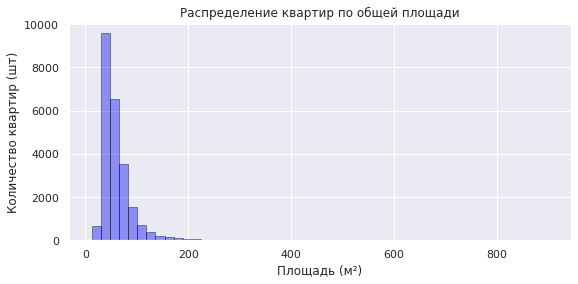

In [47]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['total_area'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по общей площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир (шт)')


(0, 200)

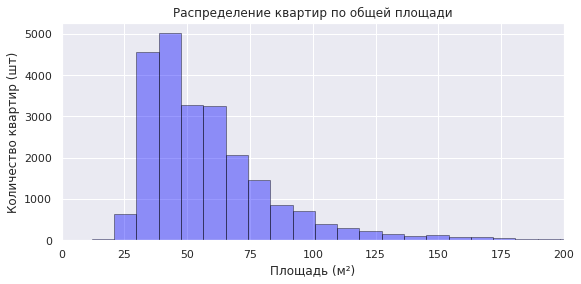

In [48]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['total_area'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по общей площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,200])

На гистограмме видим, что большая часть квартир имеет площадь от 30 до 80 кв.м, пик - в районе 45 кв.м.

Построим гистограмму для '*last_price'*

Text(0, 0.5, 'Количество квартир (шт)')

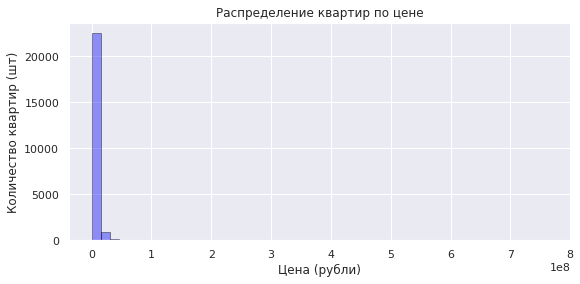

In [49]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['last_price'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по цене')
plt.xlabel('Цена (рубли)')
plt.ylabel('Количество квартир (шт)')

Ничего не понятно, посмотрим на выбросы.

Text(0, 0.5, 'Цена (рубли)')

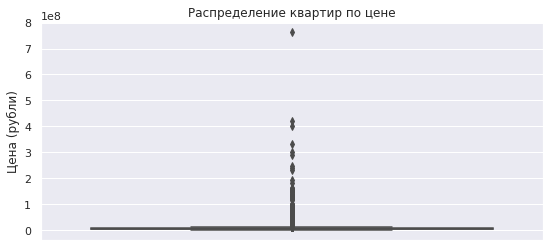

In [50]:
plt.figure(figsize=(9,4))
sns.set()
sns.boxplot(y=data_merged ['last_price'])
plt.title('Распределение квартир по цене')
plt.ylabel('Цена (рубли)')

Опять же ничего не понятно, избавимся от выбросов вручную. Для этого вычислим межквартильные размахи Q1 и Q3, узнаем растояние между ними и сделаем срез данных в котором цена будет меньше чем межквартильный размах плюс полтора.

In [51]:
last_prise_q1 = data_merged['last_price'].quantile(0.25)
last_price_q3 = data_merged['last_price'].quantile(0.75)
last_price_box = last_price_q3 - last_prise_q1
data_merged_ql = data_merged.query('last_price <= @last_price_q3 + 1.5 * @last_price_box')

Text(0, 0.5, 'Количество квартир (шт)')

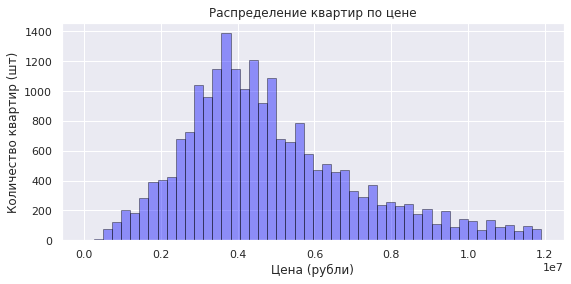

In [52]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_ql['last_price'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по цене')
plt.xlabel('Цена (рубли)')
plt.ylabel('Количество квартир (шт)')

На гистограме видим что больша часть квартир продается от 3 до 6 млн, пик значения 3,8 млн. При этом есть цены и гораздл ниже и гораздо выше

Построим гистограмму для '*rooms'*

Text(0, 0.5, 'Количество квартир (шт)')

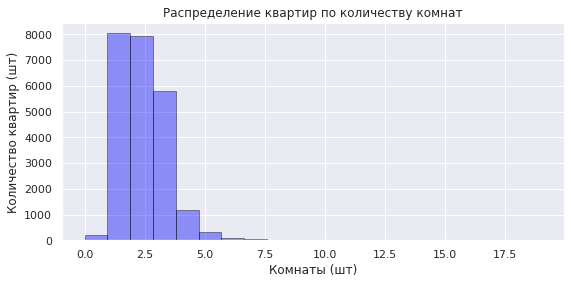

In [53]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['rooms'], hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Количество квартир (шт)')

(0, 6)

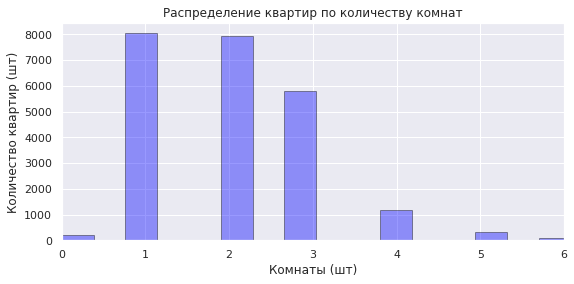

In [54]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['rooms'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,6])

На гистограмме видим, что большинство квартир имеют 1 или 2 комнаты, чуть реже 3, и еще реже 4 комнаты. Количество комнат более 5 сильно ниже.

Построим гистограмму для '*ceiling_height'*

Text(0, 0.5, 'Количество квартир (шт)')

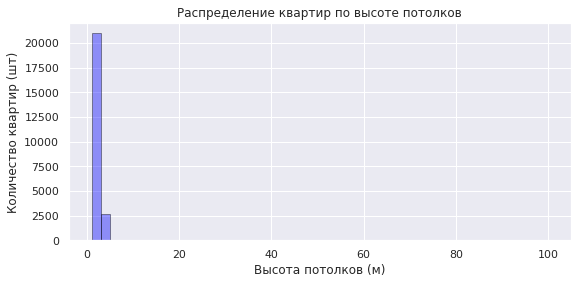

In [55]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['ceiling_height'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир (шт)')

(2, 4)

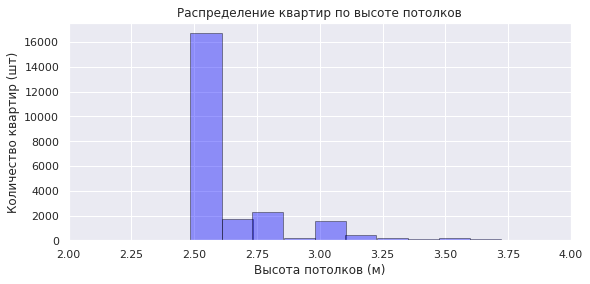

In [56]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['ceiling_height'], hist=True, kde=False, 
             bins=800, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по высоте потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([2,4])

На гистограмме видим, что квартиры в большинстве своем имеют потолки от 2,5 м до 2,6 м.

### Шаг 4.1. Вывод

Проанализирова данную территорию и изучив следующие параметры: площадь, цена, число комнат, высота потолков. Пришли к выводу:

- Большая часть квартир в центре имеет площадь от 30 до 80 кв.м, больше всего квартир с площадью 45 кв.м
- Квартиры продаются от 3 до 6 млн, больше всего квартир продается за 3,8 млн.
- Больше всего квартир имеет 1 или 2 комнаты, чуть реже 3 комнаты.
- Квартиры в большинстве своем имеют потолки от 2,5 м до 2,6 м.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.2. Сроки продажи квартиры

Ответим на следующий вопрос: *Сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?*


In [57]:
display(data_merged['days_exposition'].describe())
display(data_merged['days_exposition'].median())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

95.0

Из данных видим что некоторые квартиры продавались более 4 лет, а есть счастливчики которые сделали это за 1 день. Это наверняка выбивающиеся значения, причины которым я описывал выше, а именно обьявление либо было не было закрыто вовремя, продавец банально забыл это сделать, или по какой то причине продавец закрыл обьявление одним днем, может передумал продавать?
Среднее время продажи 180 дней(6 месяцев), что вполне хорошо, медианное вообще 95 дней(3 месяца), а это вообще очень круто.

Text(0, 0.5, 'Количество квартир (шт)')

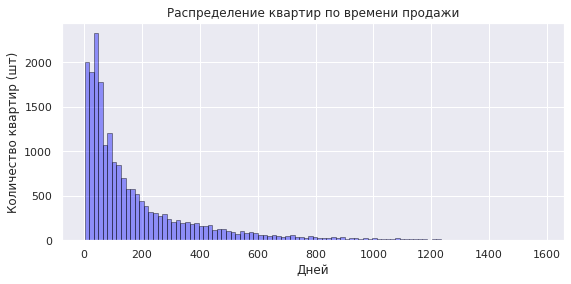

In [58]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['days_exposition'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по времени продажи')
plt.xlabel('Дней')
plt.ylabel('Количество квартир (шт)')

Чаще всего квартиры продавались в течении 50 дней, далее продажи идут на спад.
Построим диаграмму размаха, посмотрим на выбросы.

Text(0, 0.5, 'Дней')

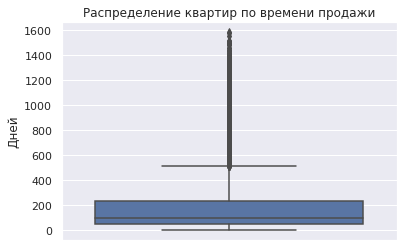

In [59]:
sns.boxplot(y=data_merged['days_exposition'])
plt.title('Распределение квартир по времени продажи')
plt.ylabel('Дней')

Отброисм все значения по продаже более 500 дней и посмотрим на гистограмму

(0, 500)

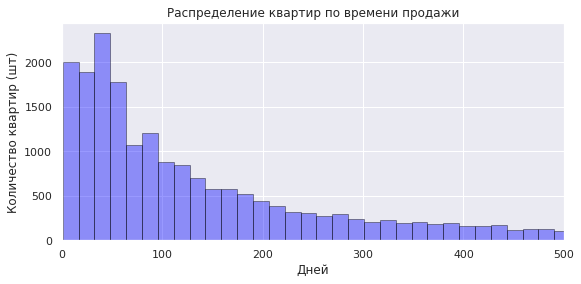

In [60]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['days_exposition'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по времени продажи')
plt.xlabel('Дней')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,500])
#data_merged.query('days_exposition<500')['days_exposition'].hist(bins=100, figsize=(10,5), ec='black')

Пик немного сместился и находитсся примерно на 45 днях. Посмотрим еще поближе

(0, 70)

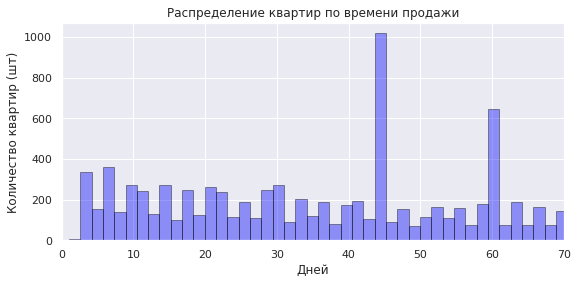

In [61]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['days_exposition'], hist=True, kde=False, 
             bins=1000, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по времени продажи')
plt.xlabel('Дней')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,70])

Имее два явно выраженых пика в 45 дней и 60 дней. Могу предположить что это происходит преднамеренно. Продавец который продал свою квартиру, на радостях забывает закрыть обьявление и тут в работу вступает Яндекс, а именно он начинает интересоваться, продал ли продавец свою квартиру и только после это провадец вспоминает что он уже это сделал и закрывает свое обьявление. Как видим из гистограммы это скорее всего происходит на каждый 15 день после 30 дней. Проверим эту теорию.

(25, 70)

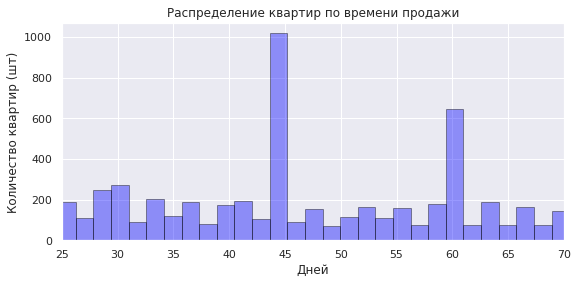

In [62]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged['days_exposition'], hist=True, kde=False, 
             bins=1000, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир по времени продажи')
plt.xlabel('Дней')
plt.ylabel('Количество квартир (шт)')
plt.xlim([25,70])

Гипотеза подтверждена.

### Шаг 4.2. Вывод

Продажа квартиры обычно занимает 50 дней. Быстрыми продажами можно считать, продажи до 50 дней, медленными после 200 дней.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.3.  Зависимость стоимости квартиры от разных параметров

Ответим на следующий вопрос: *Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.*

Зависит ли стоимость квартиры от стоимости квадратного метра

Построим диаграмму рассеивания

Text(0, 0.5, 'Цена (рубли)')

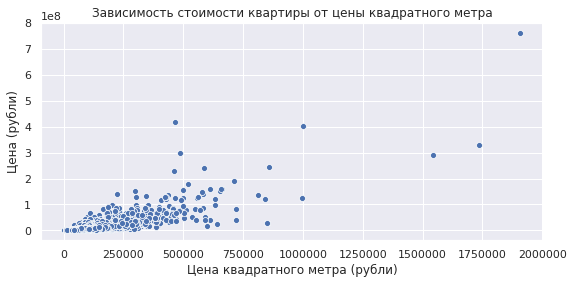

In [63]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='price_m2', y='last_price', data=data_merged, alpha=1)
plt.title('Зависимость стоимости квартиры от цены квадратного метра')
plt.xlabel('Цена квадратного метра (рубли)')
plt.ylabel('Цена (рубли)')

Уберем выбросы

(0, 10000000)

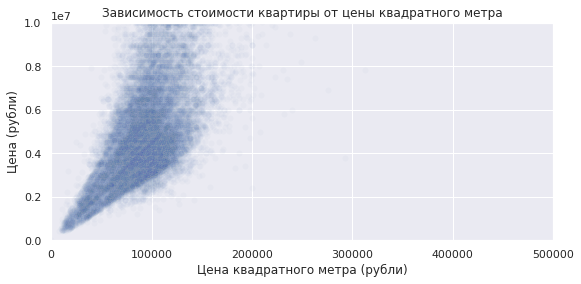

In [64]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='price_m2', y='last_price', data=data_merged, alpha=0.03)
plt.title('Зависимость стоимости квартиры от цены квадратного метра')
plt.xlabel('Цена квадратного метра (рубли)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,500000])
plt.ylim([0,10000000])

Чем больше стоимость квадратного метра, тем дороже квартира. При стоимости квадратного метра более 150000 тысяч, цена перестает сильно зависить от этого фактора.

Зависит ли стоимость квартиры от числа комнат

Построим график

Text(0, 0.5, 'Цена (рубли)')

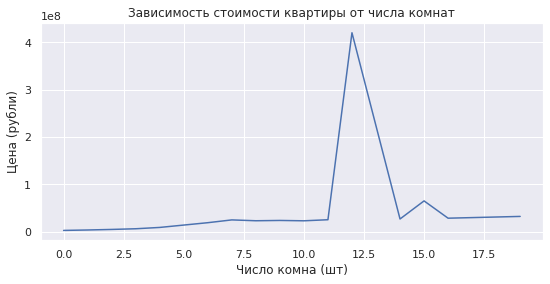

In [65]:
room_price = data_merged.pivot_table(index='rooms', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=room_price.index, y='last_price', data=room_price)
plt.title('Зависимость стоимости квартиры от числа комнат')
plt.xlabel('Число комна (шт)')
plt.ylabel('Цена (рубли)')

Уберем выбросы

Text(0, 0.5, 'Квартиры')

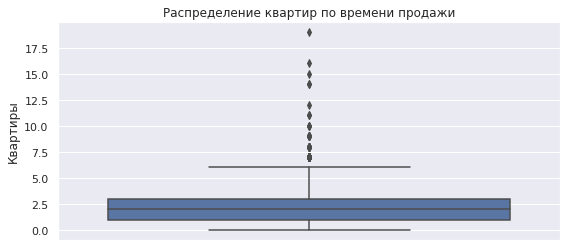

In [66]:
plt.figure(figsize=(9,4))
sns.boxplot(y=data_merged['rooms'])
plt.title('Распределение квартир по времени продажи')
plt.ylabel('Квартиры')

(0, 10000000)

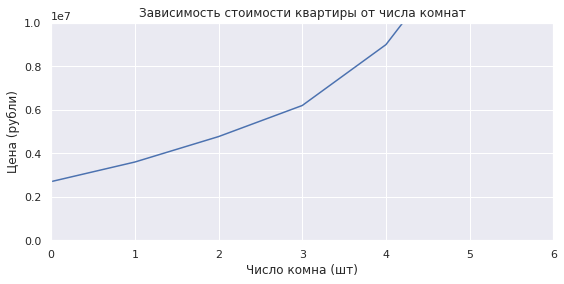

In [67]:
room_price = data_merged.pivot_table(index='rooms', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=room_price.index, y='last_price', data=room_price)
plt.title('Зависимость стоимости квартиры от числа комнат')
plt.xlabel('Число комна (шт)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,6])
plt.ylim([0,10000000])

Чем больше комнат, тем больше стоимость квартиры

Зависит ли стоимость квартиры от этажа (первый, последний, другой)

Text(0, 0.5, 'Цена (рубли)')

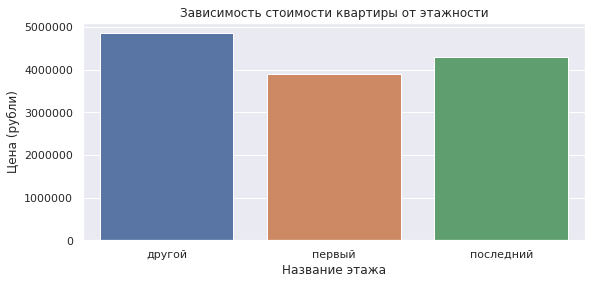

In [68]:
floor_name_price = data_merged.pivot_table(index='floor_name', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.barplot(x=floor_name_price.index, y='last_price', data=floor_name_price)
plt.title('Зависимость стоимости квартиры от этажности')
plt.xlabel('Название этажа')
plt.ylabel('Цена (рубли)')

Стоимость квартир на первом этаже меньше, чем на последнее, а на последнем меньше чем на другом

Зависит ли стоимость квартиры от удаленности от центра

Text(0, 0.5, 'Цена (рубли)')

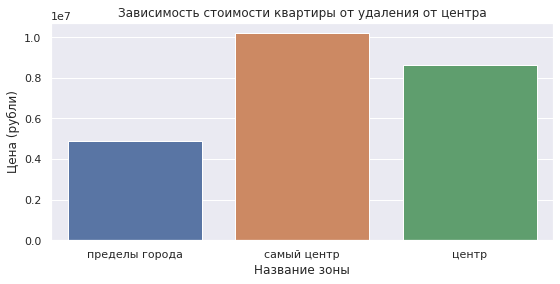

In [69]:
center_layout_price = data_merged.pivot_table(index='center_layout', values='last_price',aggfunc='median')
plt.figure(figsize=(9,4))
sns.barplot(x=center_layout_price.index, y='last_price', data=center_layout_price)
plt.title('Зависимость стоимости квартиры от удаления от центра')
plt.xlabel('Название зоны')
plt.ylabel('Цена (рубли)')

Чем ближе к самому центру тем дороже квартира.

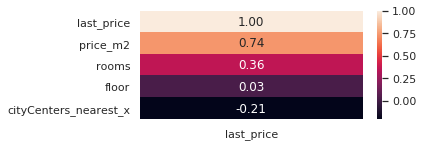

In [70]:
correlation1 = data_merged[['price_m2', 'rooms', 'floor','cityCenters_nearest_x', 'last_price']].corr()[['last_price']].sort_values(by='last_price', ascending=False)  
plt.figure(figsize=(5,2))
sns.heatmap(correlation1, annot=True, fmt='.2f')

### Шаг 4.3. Вывод

Ответим на вопрос: *Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.*
 
- Цена квартиры напрямую от стоимости квадратного метра. Однако после того как стоимость квадратного метра становится более 150000 тысяч рублей, цена перестает сильно зависить от этого фактора.
- Цена квартиры напрямую зависит количества комнат в этой квартире, чем больше комнат, тем больше стоимость.
- Цена на квартиру зависит от этажности, так квартиры на первом этаже стоят меньше, чем на последнее, а на последнем стоят меньше чем на другом.
- Цена на квартиру напрямую зависит от удаленности от центра, чем дальше, тем меньше стоимость.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.4. Изучим зависимость от даты размещения: дня недели, месяца и года

Ответим на следующий вопрос: *Зависит ли стоимость квартиры от даты размещения: дня недели, месяца и года?*

Зависимость от дня недели

Text(0, 0.5, 'Цена (рубли)')

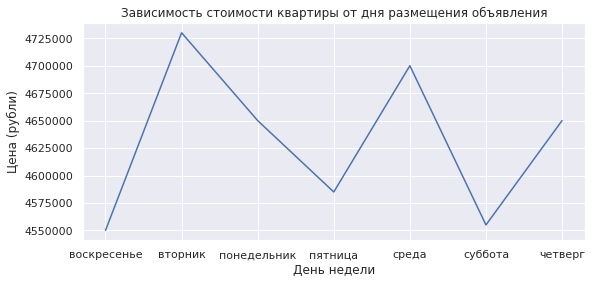

In [71]:
weekday_price = data_merged.pivot_table(index='weekday_name', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=weekday_price.index, y='last_price', data=weekday_price)
plt.title('Зависимость стоимости квартиры от дня размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена (рубли)')

Обьявления которые были выставлены в будний день имеют цену выше чем выставленные в выходные

Зависимость от месяца

Text(0, 0.5, 'Цена (рубли)')

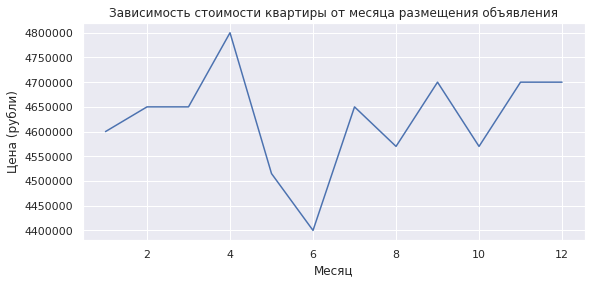

In [72]:
month_price = data_merged.pivot_table(index='month', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=month_price.index, y='last_price', data=month_price)
plt.title('Зависимость стоимости квартиры от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена (рубли)')

Обьявления высталвенные в апреле имеют самую высокую цену, а июне самую низкую, по сравнению с другими месяцами.

Зависимость от года

Text(0, 0.5, 'Цена (рубли)')

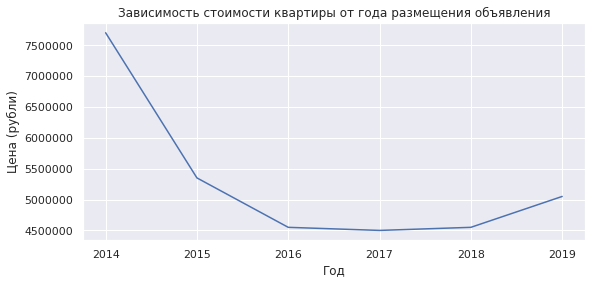

In [73]:
year_price = data_merged.pivot_table(index='year', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=year_price.index, y='last_price', data=year_price)
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

Очень странно выделяется 2014, посмотрим на него по подробнее, может как раз туда попала квартира стоимостью 763 млн. рублей

(0, 10000000)

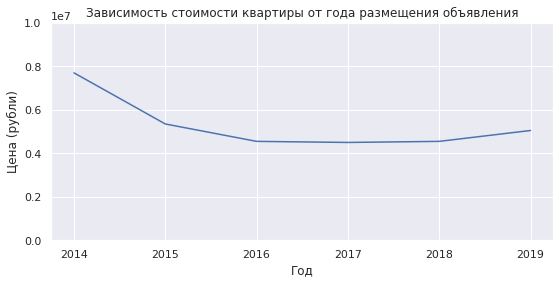

In [74]:
year_price = data_merged.pivot_table(index='year', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=year_price.index, y='last_price', data=year_price)
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')
plt.ylim([0,10000000])

Все равно 2014 выделяется своими ценами. Посмотрим на него поподробней

Text(0, 0.5, 'Цена (рубли)')

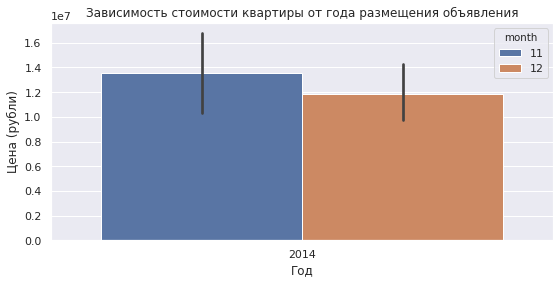

In [75]:
year_price_q = data_merged.query('year == 2014')
plt.figure(figsize=(9,4))
sns.barplot(x='year', y='last_price', data=year_price_q, hue='month')
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

Всего 2 месяца попало в выборку, ноябрь и декабрь. Поэтому навернои медианная цена такая высокая, потому что по данному году невозможно оценить выборку по месяцам, а как показывают нам предыдущие резьтаты ноябрь и декабрь имеют достаточно большие цены на квартиры. Проверим так же 2019 год.

Text(0, 0.5, 'Цена (рубли)')

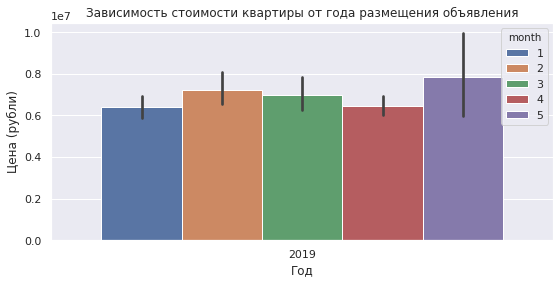

In [76]:
year_price_q1 = data_merged.query('year == 2019')
plt.figure(figsize=(9,4))
sns.barplot(x='year', y='last_price', data=year_price_q1, hue='month')
plt.title('Зависимость стоимости квартиры от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

 По 2019 почти такая же картина как и 2014, только в выборку попали первые 5 месяцев, однако эти месяца тоже имеют одни из самых больших цен.

Цены на квартиры в 2014 году были значительно выше чем последующих годах, скорее всего это связано с тем что в выборку попали только ноябрь и декабрь, где цена на квартиры достаточно большие. Тоже самое произошло и с 2019 годом, выборка всего из 5 месяцев, среди которых имеются месяца с самой большой ценой. Если отбросить эти года, цены в среднем с 2016 года остаются наодном уровне.

### Шаг 4.4. Вывод

Ответим на вопрос: *Зависит ли стоимость квартиры от даты размещения: дня недели, месяца и года?*
Обьявления высталвенне в будний день в апреле более дорогие, чем выставленые в выходной в июне.
В 2014 цены на квартиры были значительно выше, начиная с 2019 цена снова начала расти.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.5. Населённые пункты с самой высокой и низкой стоимостью жилья

Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [77]:
top10 = data_merged.pivot_table(index='locality_name', values=['price_m2', 'last_price'], aggfunc={'last_price':'count', 'price_m2':'mean'})
top10.sort_values('last_price', ascending=False).head(10)

,last_price,price_m2
locality_name,,
Санкт-Петербург,15749,114836.837958
посёлок Мурино,522,85752.070881
посёлок Шушары,440,78677.520455
Всеволожск,398,68654.894472
Пушкин,369,103125.379404
Колпино,338,75423.908284
посёлок Парголово,327,90176.810398
Гатчина,307,68745.641694
деревня Кудрово,299,92471.515050


In [78]:
max_min_price = data_merged.pivot_table(index='locality_name', values=['last_price'], aggfunc={'last_price':'mean'})
display(max_min_price.sort_values('last_price', ascending=False).head(1))
display(max_min_price.sort_values('last_price', ascending=False).tail(1))

,last_price
locality_name,
посёлок Репино,12166854.0


,last_price
locality_name,
деревня Вахнова Кара,450000.0


### Шаг 4.5. Вывод

ТОП 10 населеных пунктов по количеству объявлений и стоимость кв.м жилплощади в них, выведены на экран

Поселок Репино, курортный район, цена вполне ожидаема. Деревня Вахнова Кара, 188 км от Санкт-Петербкург, тут тоже все ожидаемо.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.6. Изучите предложения квартир: какая область входит в центр и как цена зависит от удалённости от центра.

Выделите квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр. Для этого создадим столбец с расстоянием до центра в километрах и округлим до целых значений. Построим график как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [79]:
data_merged_spb = data_merged.query('locality_name == "Санкт-Петербург"')
data_merged_spb['cityCenters_kms'] = (data_merged_spb['cityCenters_nearest_x']/1000).round()
data_merged_spb.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,price_m2,weekday,weekday_name,month,year,floor_name,living_ratio,kitchen_ratio,center_layout,cityCenters_kms
0,20,13000000,108.000000,2019-03-07,3,2.699219,16.0,51.0000,8,NaN,...,120370,3,четверг,3,2019,другой,0.5,0.2,пределы города,16.0
2,10,5196000,56.000000,2015-08-20,2,2.599609,5.0,34.3125,4,NaN,...,92785,3,четверг,8,2015,другой,0.6,0.1,пределы города,14.0
3,0,64900000,159.000000,2015-07-24,3,2.599609,14.0,NaN,9,NaN,...,408176,4,пятница,7,2015,другой,NaN,NaN,центр,7.0
4,2,10000000,100.000000,2018-06-19,2,3.000000,14.0,32.0000,13,NaN,...,100000,1,вторник,6,2018,другой,0.3,0.4,центр,8.0
7,5,7915000,71.599998,2019-04-18,2,2.599609,24.0,NaN,22,NaN,...,110544,3,четверг,4,2019,другой,NaN,0.3,пределы города,12.0


Text(0, 0.5, 'Цена (рубли)')

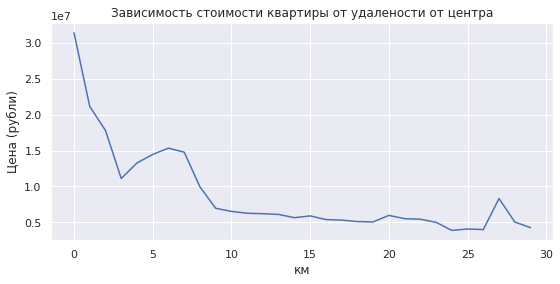

In [80]:
center_km_price = data_merged_spb.pivot_table(index='cityCenters_kms', values='last_price', aggfunc='mean')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_km_price.index, y='last_price', data=center_km_price)
plt.title('Зависимость стоимости квартиры от удалености от центра')
plt.xlabel('км')
plt.ylabel('Цена (рубли)')

### Шаг 4.6. Вывод

График сильно меняется в районе 9 км, значит это и есть центр. Видим там же разбитие данного от резка на 2 части: до 3км и с 3км до 9км. Как я и предполагал, когда делал категоризация цены будут различаться в *самом центре* и *центре*. Так же мы видимм что с 3 км до 7км центы вновь растут, скорее всего это говорит о присутсвуии каких-то "элитных" районов которые не входят в *самый центр*, но пападают в данный промежуток.


Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.7. Изучем следующие параметры для квартир в центре: площадь, цена, число комнат, высота потолков

Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков.

Выделим область центра

In [81]:
data_merged_center = data_merged_spb.query('cityCenters_nearest_x <= 9000')

In [82]:
data_merged_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe().style.format({'last_price': '{:.2f}'})

,total_area,last_price,rooms,ceiling_height
count,4404,4404.00,4404,4404
mean,88.5067,13742600.48,2.72094,2.93359
std,57.8298,22909724.67,1.40842,1.67676
min,12,1600000.00,0,2
25%,53.275,6200000.00,2,2.59961
50%,75,8700000.00,3,2.80078
75%,104.5,13500000.00,3,3.09961
max,900,763000000.00,19,100


Из полученых парметров выделим следующее:
- Площадь квартир разнится от 12 кв.м. до 900 кв.м.
- Максимальная цена за квартиру составляет 763 млн. рублей, а минимальная 1,6 млн. .
- Число комнат разнится от 0 до 19, предполагаю что 0 комнат это студия, а 19 комнат это какие то апартаменты (хостелы/общежития/нежелые помещения)
- высота потолков от 2ух метров до 100, среднее значение выглядит вполне нормальным.

Text(0, 0.5, 'Количество квартир (шт)')

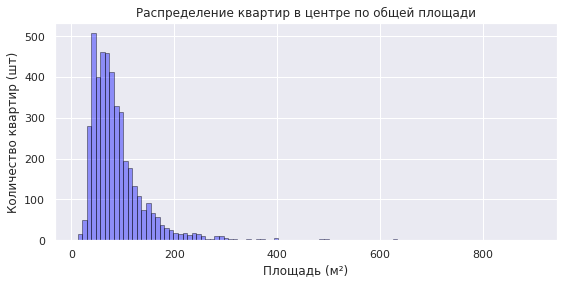

In [83]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['total_area'], hist=True, kde=False, 
             bins=100, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по общей площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир (шт)')

(0, 300)

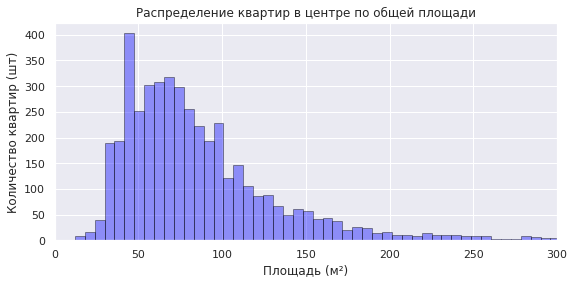

In [84]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['total_area'], hist=True, kde=False, 
             bins=150, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по общей площади')
plt.xlabel('Площадь (м²)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,300])

На гистограмме видим, что большая часть квартир имеет площадь от 30 до 100 кв.м. Пик приходится на площадь в 45 кв.м.

Text(0, 0.5, 'Количество квартир (шт)')

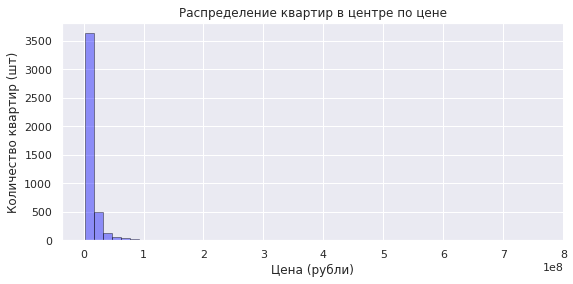

In [85]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['last_price'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по цене')
plt.xlabel('Цена (рубли)')
plt.ylabel('Количество квартир (шт)')

In [86]:
last_prise_q1_center = data_merged_center['last_price'].quantile(0.25)
last_price_q3_center = data_merged_center['last_price'].quantile(0.75)
last_price_box_center = last_price_q3_center - last_prise_q1_center
data_merged_center_ql = data_merged_center.query('last_price <= @last_price_q3_center + 1.5 * @last_price_box_center')

Text(0, 0.5, 'Количество квартир (шт)')

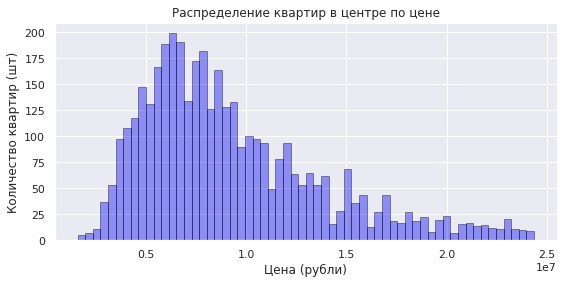

In [87]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center_ql['last_price'], hist=True, kde=False, 
             bins=60, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по цене')
plt.xlabel('Цена (рубли)')
plt.ylabel('Количество квартир (шт)')

На гистограме видим что больша часть квартир продается от 2.5 до 14 млн, пик значения 7 млн. При этом есть цены ниже и гораздо выше.

Text(0, 0.5, 'Количество квартир (шт)')

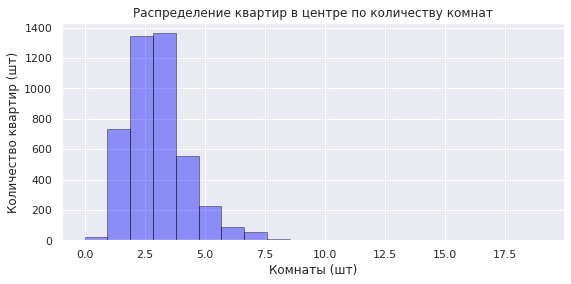

In [88]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['rooms'], hist=True, kde=False, 
             bins=20, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по количеству комнат')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Количество квартир (шт)')

(0, 8)

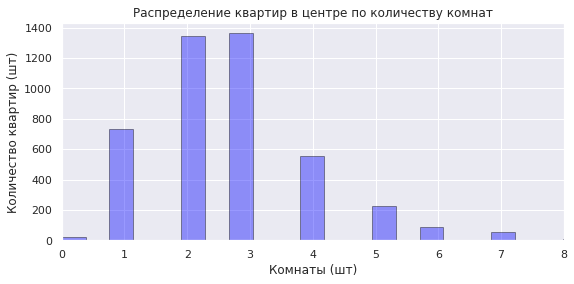

In [89]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['rooms'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по количеству комнат')
plt.xlabel('Комнаты (шт)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([0,8])

На гистограмме видим, что большинство квартир имеют 2 или 3 комнаты, чуть реже 1 комнату и 4 комнаты, и еще реже 5 комнат. Количество комнат более 6 сильно ниже.

Text(0, 0.5, 'Количество квартир (шт)')

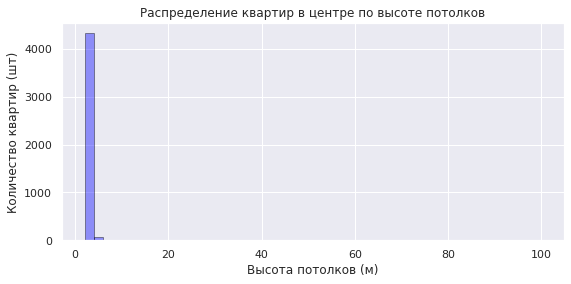

In [90]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['ceiling_height'], hist=True, kde=False, 
             bins=50, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по высоте потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир (шт)')

(2, 5)

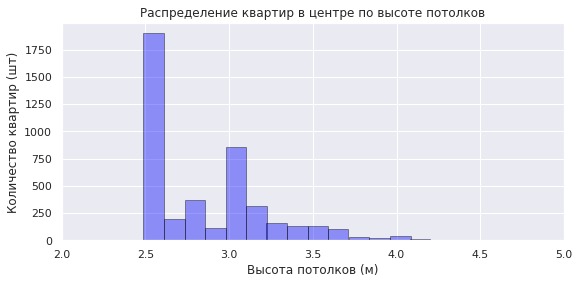

In [91]:
plt.figure(figsize=(9,4))
sns.set()
sns.distplot(data_merged_center['ceiling_height'], hist=True, kde=False, 
             bins=800, color = 'blue',
             hist_kws={'edgecolor':'black'})

plt.title('Распределение квартир в центре по высоте потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир (шт)')
plt.xlim([2,5])

На гистограмме видим, что квартиры в большинстве своем имеют потолки 2,6 м. Реже встречаются квартиры с высотой потолков около 3 м.

### Шаг 4.7. Вывод

Проанализирова центральную территорию и изучив следующие параметры: площадь, цена, число комнат, высота потолков. Пришли к выводу:

- Большая часть квартир имеет площадь от 30 до 100 кв.м. Пик приходится на площадь в 45 кв.м.
- Квартиры продаются от 2.5 до 14 млн, больше всего квартир продается за 7 млн.
- Больше всего квартир имеет 2 или 3 комнаты.
- Квартиры в большинстве своем имеют потолки 2,6 м, чуть реже с потолком 3 м.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.8. Факторы, которые влияют на стоимость квартиры: число комнат, этаж, удалённость от центра, дата размещения объявления**

Выделим факторы, которые влияют на стоимость квартиры (цена за квадратный метр, число комнат, этаж, удалённость от центра, дата размещения объявления). Сделаем выводы.

Зависит ли стоимость квартиры в центре от стоимости квадратного метра

Text(0, 0.5, 'Цена (рубли)')

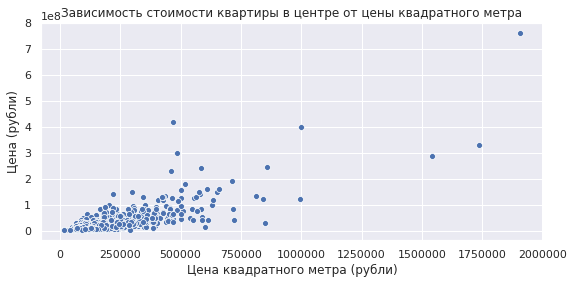

In [92]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='price_m2', y='last_price', data=data_merged_center, alpha=1)
plt.title('Зависимость стоимости квартиры в центре от цены квадратного метра')
plt.xlabel('Цена квадратного метра (рубли)')
plt.ylabel('Цена (рубли)')

(0, 30000000)

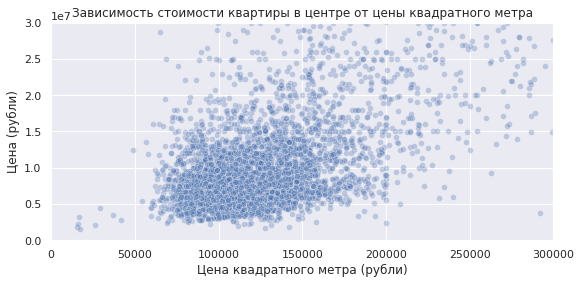

In [93]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='price_m2', y='last_price', data=data_merged_center, alpha=0.3)
plt.title('Зависимость стоимости квартиры в центре от цены квадратного метра')
plt.xlabel('Цена квадратного метра (рубли)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,300000])
plt.ylim([0,30000000])

Стоимость квартиры в центре напрямую зависит от квадратного метра. Большинство квартир продается в пределе от 75000 до 160000 рублей.

Зависит ли стоимость квартиры в центре от количества комнат

Text(0, 0.5, 'Цена (рубли)')

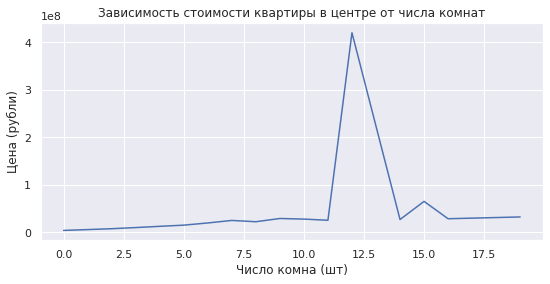

In [94]:
center_room_rice = data_merged_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_room_rice.index, y='last_price', data=center_room_rice)
plt.title('Зависимость стоимости квартиры в центре от числа комнат')
plt.xlabel('Число комна (шт)')
plt.ylabel('Цена (рубли)')

(0, 25000000)

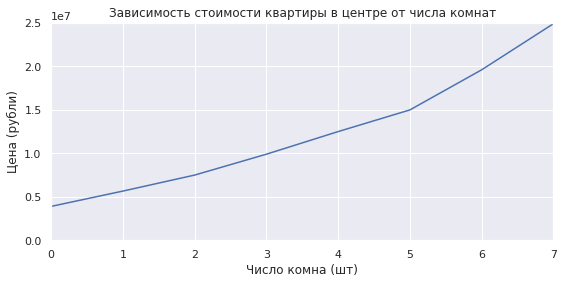

In [95]:
center_room_price = data_merged_center.pivot_table(index='rooms', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_room_price.index, y='last_price', data=center_room_price)
plt.title('Зависимость стоимости квартиры в центре от числа комнат')
plt.xlabel('Число комна (шт)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,7])
plt.ylim([0,25000000])

Чем больше комнат, тем больше стоимость квартиры

Зависит ли стоимость квартиры в центре от этажа

Text(0, 0.5, 'Цена (рубли)')

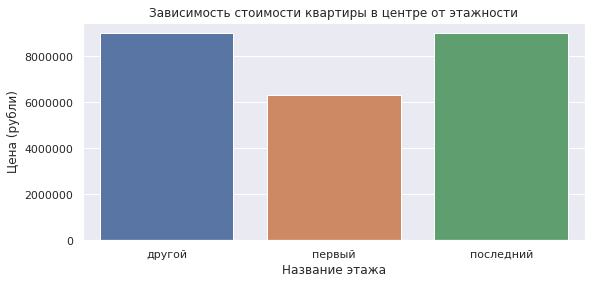

In [96]:
center_floor_name_price = data_merged_center.pivot_table(index='floor_name', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.barplot(x=center_floor_name_price.index, y='last_price', data=center_floor_name_price)
plt.title('Зависимость стоимости квартиры в центре от этажности')
plt.xlabel('Название этажа')
plt.ylabel('Цена (рубли)')

Стоимость квартир на первом этаже меньше, чем на последнеем и на другом. Это же центр Санкт-Петербурга, здесь чем выше, тем красивей вид.

Зависит ли стоимость квартиры в центре от удаленности от центра

Text(0, 0.5, 'Цена (рубли)')

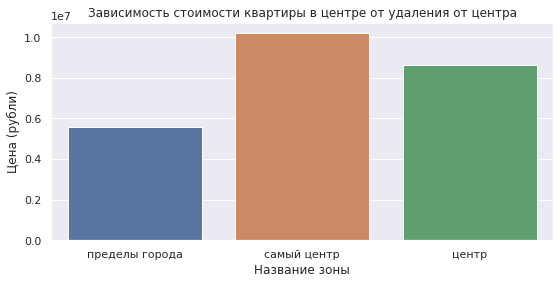

In [97]:
center_center_layout_price = data_merged_center.pivot_table(index='center_layout', values='last_price',aggfunc='median')
plt.figure(figsize=(9,4))
sns.barplot(x=center_center_layout_price.index, y='last_price', data=center_center_layout_price)
plt.title('Зависимость стоимости квартиры в центре от удаления от центра')
plt.xlabel('Название зоны')
plt.ylabel('Цена (рубли)')

Квартиры в пределах самого центра (0-3км), дороже чем в центре (3-9 км), а эти в свою очередь намного дороже чем в пределах города (9-20км).

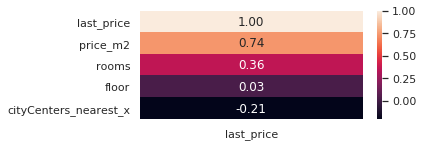

In [98]:
correlation2 = data_merged_center[['price_m2', 'rooms', 'floor','cityCenters_nearest_x', 'last_price']].corr()[['last_price']].sort_values(by='last_price', ascending=False)  
plt.figure(figsize=(5,2))
sns.heatmap(correlation1, annot=True, fmt='.2f')

### Шаг 4.8. Вывод

Ответим на вопрос: *Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от числа комнат, этажа (первого или последнего), удалённости от центра.*

- Стоимость квартиры в центре напрямую зависит от квадратного метра. Большинство квартир продается в пределе от 75000 до 160000 рублей.
- Цена квартиры напрямую зависит количества комнат в этой квартире, чем больше комнат, тем больше стоимость.
- Цена на квартиру зависит от этажности, так квартиры на первом этаже стоят меньше, чем чем на последнеем и на другом.
- Цена на квартиру напрямую зависит от удаленности от центра, чем дальше, тем меньше стоимость.

Вернуться к [**Содержанию**](#Содержание)

### Шаг 4.9. Изучим зависимость стоимости в центре от даты размещения: дня недели, месяца и года

Text(0, 0.5, 'Цена (рубли)')

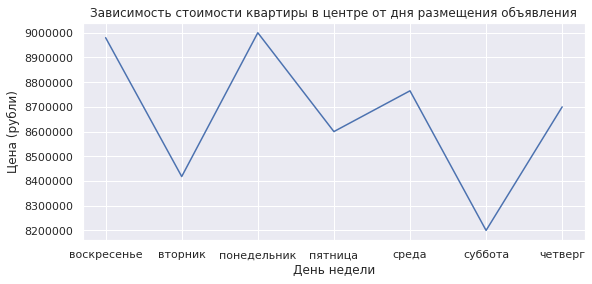

In [99]:
center_weekday_price = data_merged_center.pivot_table(index='weekday_name', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_weekday_price.index, y='last_price', data=center_weekday_price)
plt.title('Зависимость стоимости квартиры в центре от дня размещения объявления')
plt.xlabel('День недели')
plt.ylabel('Цена (рубли)')

Обьявления которые были выставлены в воскресенье и понедельник имеют самую большую цену, вторник и суббота же наоборот самую маленькую.

Зависит ли стоимость квартиры в центре от месяца

Text(0, 0.5, 'Цена (рубли)')

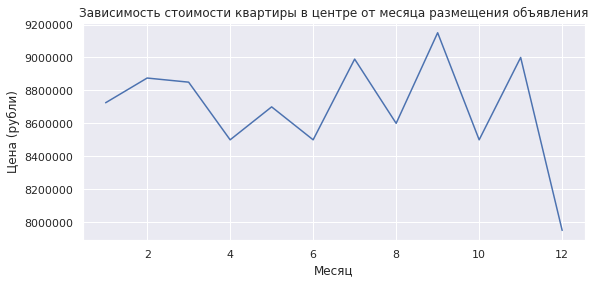

In [100]:
center_month_price = data_merged_center.pivot_table(index='month', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_month_price.index, y='last_price', data=center_month_price)
plt.title('Зависимость стоимости квартиры в центре от месяца размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Цена (рубли)')

Обьявления высталвенные в июле,сентябре,ноябре имеют самую высокую цену, а в декабре самую низкую, по сравнению с другими месяцами.

Зависит ли стоимость квартиры в центре от года

Text(0, 0.5, 'Цена (рубли)')

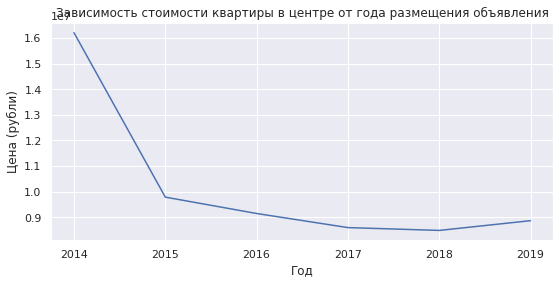

In [101]:
center_year_price = data_merged_center.pivot_table(index='year', values='last_price', aggfunc='median')
plt.figure(figsize=(9,4))
sns.lineplot(x=center_year_price.index, y='last_price', data=center_year_price)
plt.title('Зависимость стоимости квартиры в центре от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

Text(0, 0.5, 'Цена (рубли)')

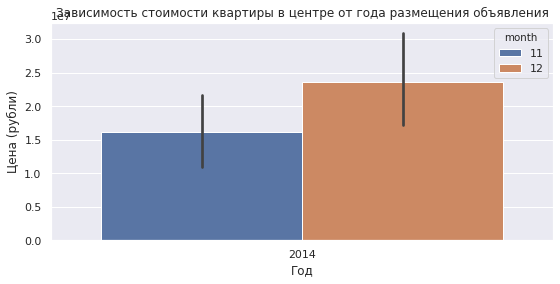

In [102]:
center_year_price_q = data_merged_center.query('year == 2014')
plt.figure(figsize=(9,4))
sns.barplot(x='year', y='last_price', data=center_year_price_q, hue='month')
plt.title('Зависимость стоимости квартиры в центре от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

Text(0, 0.5, 'Цена (рубли)')

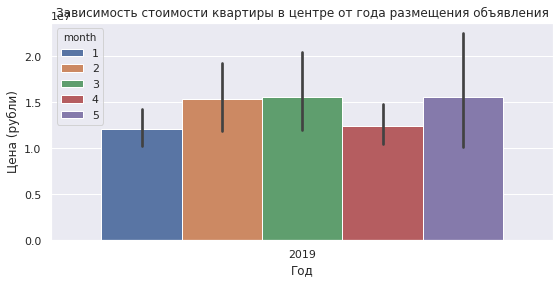

In [103]:
center_year_price_q1 = data_merged_center.query('year == 2019')
plt.figure(figsize=(9,4))
sns.barplot(x='year', y='last_price', data=center_year_price_q1, hue='month')
plt.title('Зависимость стоимости квартиры в центре от года размещения объявления')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')

Цены на квартиры в 2014 году были значительно выше чем последующих годах, скорее всего это связано с тем что в выборку попали только ноябрь с самыми большими ценами и декабрь. С 2015 по 2018 года цены на квартиры в центре падают. С 2019 цены начинают расти, но тут ситуация как с 2019 годом, выборка не полная и включает в себя первые 5 месяцев, где стоимость квартиры в среднем высокая.

### Шаг 4.9. Вывод

Ответим на вопрос: *Зависит ли стоимость квартиры в центре от даты размещения: дня недели, месяца и года?*
В воскресенье и понедельник самые дорогие квартиры, во вторник и субботу же наоборот самую дешевые. В июле, сентябре и ноябре самые большие цены, а в декабре самые маленькие. Цены в 2014 году самые большие, но это связано с выборкой, начиная с 2015 и заканчивая 2018 годом цены на квартиры в центре падали. В 2019 году ситуация похожа на 2014, выборка не полная, что не дает на право сравнивать эти данные с годами с полной выборкой.

### Шаг 4.10. Отличияются ли факторы, которые влияют на стоимость квартиры, в центре от всего файла

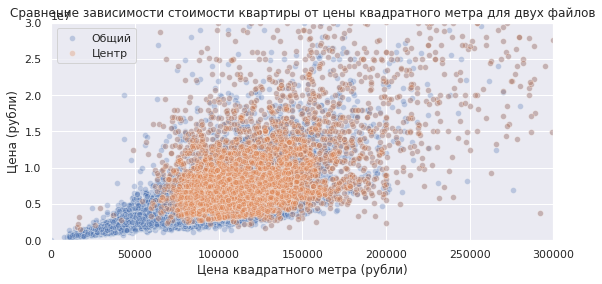

In [104]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='price_m2', y='last_price', data=data_merged, alpha=0.3)
sns.scatterplot(x='price_m2', y='last_price', data=data_merged_center, alpha=0.3)
plt.title('Сравнение зависимости стоимости квартиры от цены квадратного метра для двух файлов')
plt.xlabel('Цена квадратного метра (рубли)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,300000])
plt.ylim([0,30000000])
plt.legend(['Общий', 'Центр'])

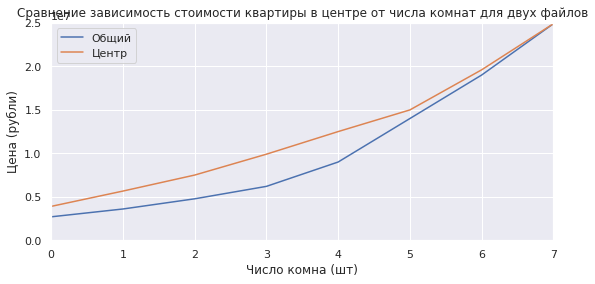

In [105]:
plt.figure(figsize=(9,4))
plt.legend(['Общий', 'Центр',])
sns.lineplot(x=center_room_price.index, y='last_price', data=room_price)
sns.lineplot(x=center_room_price.index, y='last_price', data=center_room_price)
plt.title('Сравнение зависимость стоимости квартиры в центре от числа комнат для двух файлов')
plt.xlabel('Число комна (шт)')
plt.ylabel('Цена (рубли)')
plt.xlim([0,7])
plt.ylim([0,25000000])
plt.legend(['Общий', 'Центр'])

Графики почти не отличаются, чем больше комнат, тем выше стоимость. 

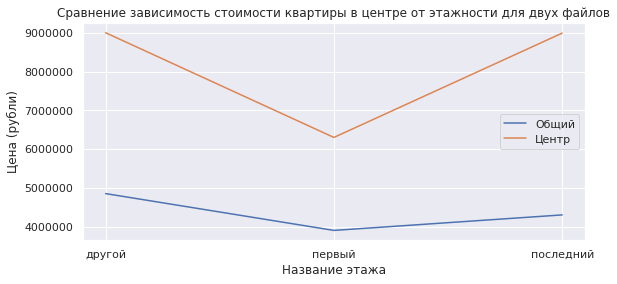

In [106]:
plt.figure(figsize=(9,4))
sns.lineplot(x=center_floor_name_price.index, y='last_price', data=floor_name_price)
sns.lineplot(x=center_floor_name_price.index, y='last_price', data=center_floor_name_price)
plt.title('Сравнение зависимость стоимости квартиры в центре от этажности для двух файлов')
plt.xlabel('Название этажа')
plt.ylabel('Цена (рубли)')
plt.legend(['Общий', 'Центр'])

На графиках видно, что цены на первый этаж везде самые дешевые, другие этажи, кроме последнего тоже похожи и стоят значительно выше первого. Последний этаж в центре стоит больше в области и приранивается по цене к другим этажам, кроме первого.

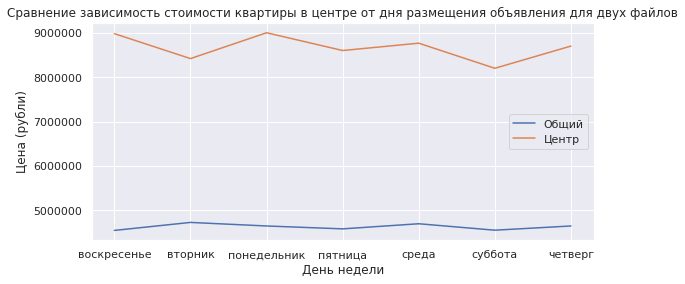

In [107]:
plt.figure(figsize=(9,4))
sns.lineplot(x=center_weekday_price.index, y='last_price', data=weekday_price)
sns.lineplot(x=center_weekday_price.index, y='last_price', data=center_weekday_price)
plt.title('Сравнение зависимость стоимости квартиры в центре от дня размещения объявления для двух файлов')
plt.xlabel('День недели')
plt.ylabel('Цена (рубли)')
plt.legend(['Общий', 'Центр'])

В общем файле обьявления открытые в будний день имеют цены чуть выше чем в выходные, в центре же видим что во вторник выкладывают объявления с самыми низкими ценами, а воскресенье и понедельник самые дорогие дни.

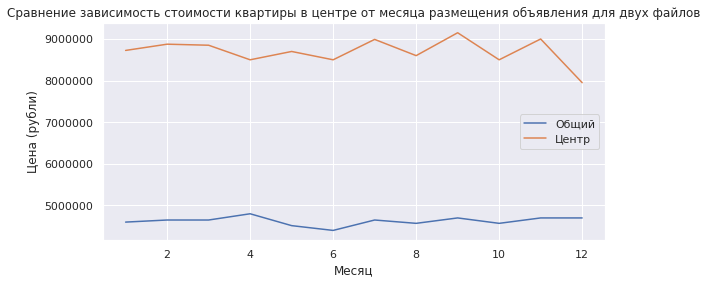

In [108]:
plt.figure(figsize=(9,4))
sns.lineplot(x=center_month_price.index, y='last_price', data=month_price)
sns.lineplot(x=center_month_price.index, y='last_price', data=center_month_price)
plt.title('Сравнение зависимость стоимости квартиры в центре от месяца размещения объявления для двух файлов')
plt.xlabel('Месяц')
plt.ylabel('Цена (рубли)')
plt.legend(['Общий', 'Центр'])

Квартиры в общем файле имеют более менее ровные цены по всем месяцам, можно выделить только июнь, когда цены самые маленькие. В центре же мы видим просадку цен с апреля по июнь и повышеные цены в июле, сентябре и ноябре. Также цена значительно падает в декабре. 

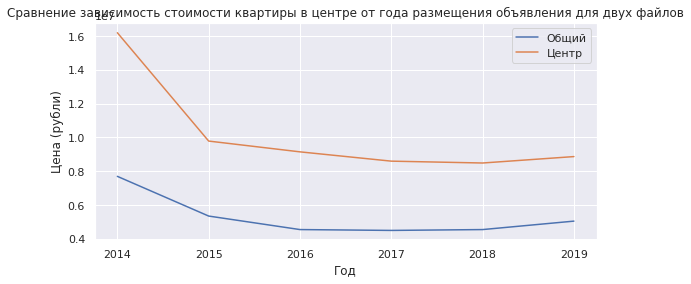

In [109]:
plt.figure(figsize=(9,4))
sns.lineplot(x=year_price.index, y='last_price', data=year_price)
sns.lineplot(x=year_price.index, y='last_price', data=center_year_price)
plt.title('Сравнение зависимость стоимости квартиры в центре от года размещения объявления для двух файлов')
plt.xlabel('Год')
plt.ylabel('Цена (рубли)')
plt.legend(['Общий', 'Центр'])

Графики почти одинковые, единственное, спад цен в 2015 в центре произошел более радикально чем в общем файле. В обоих графиках выделяется 2014 и 2019 год, связываю это с меньшей выборкой по сравнению с другими годами. 

### Шаг 4.10. Вывод

В основном факторы, которые влияют на стоимость квартиры, в центре и всего файла, имеют мало расхождений и примерно похожи.

## Шаг 4. Вывод

Провели исследовательский анализ и ответили на все вопросы исследования.

Вернуться к [**Содержанию**](#Содержание)

## Шаг 5. Общий вывод

Построим тепловую карту воспользовавшись функцией **corr()**, что посмотреть как определенные факторы влияют конечную стоимость квартиры.

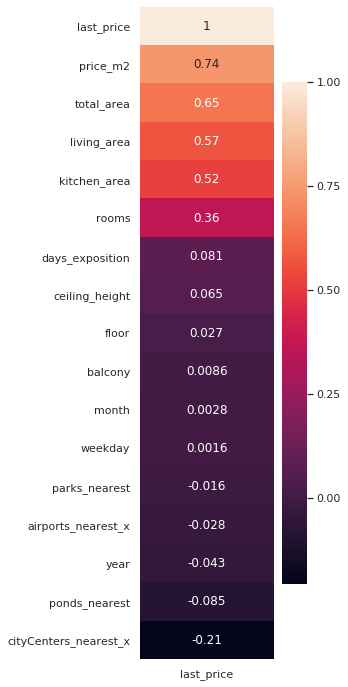

In [110]:
correlation = data_merged[['price_m2', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height', 'floor', 'balcony', 'weekday', 'month', 'year', 'cityCenters_nearest_x', 'airports_nearest_x', 'parks_nearest', 'ponds_nearest', 'days_exposition', 'last_price' ]].corr()[['last_price']].sort_values(by='last_price', ascending=False) 
plt.figure(figsize=(3,12))
sns.heatmap(correlation, annot=True, annot_kws={'size':12})

Наибольшое влияние на цену имеют следующие факторы:
- Цена за квадратный метр
- Общая площадь/жилая площадь/площадь кухни
- Количество комнат
- Растояние до центра

Остальные параметры влияют на стоимость, но не так сильно как предыдущие. 

В основе исследования лежала задача научиться определять рыночную стоимость объектов недвижимости, а именно — установить параметры которе влияют на конечную стоимость квартиры.
Обобщим данные всего исследования и рассмотрим параметры влияющие на цену квартиры:

- Цена за квадратный метр, чем выше цена за квадратный метр, тем выше цена
- Общая площадь/жилая площадь/площадь кухни, чем больше площадь, тем больше цена
- Количество комнат, чем больше комнат, тем больше цена
- Растояние до центра, чем дальше от центра тем цена ниже
- Быстрыми продажами можно считать, продажи до 50 дней, медленными после 200 дней.
- Первые этаж самый дешевый, далее идет послений этаж и самые дорогие квартиры на этажак отличающихся от первого и последнего
- Квартиры, объявленние о продаже которых было размещено в будние дни, дороже чем квартиры, объявление о которых было размещено в выходные
- В июне, цены на квартиры меньше чем в другие месяца, в остальных случаях месяц размещения не сильно влияет на цену
- С 2015 по 2018 год наблюдается спад цен на квартиры. 2014 и 2019 год, выделяются большими показателями на стоимость квартиры, но не стоит брать их в расчеты, тк выборка по сравнению с другими годами в них меньше.

Вернуться к [**Содержанию**](#Содержание)

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод